In [1]:
import stlearn as st
import scanpy as sc

data = sc.read_h5ad("deconv_stlearn_processed_data.h5ad") # obtained by running deconv_plus_stlearn.ipynb
# data = sc.read_h5ad("stlearn_processed_data") # obtained by running stlearn_original.ipynb

/home/mnik/miniconda3/envs/stlearn/lib/python3.8/site-packages/stlearn/tools/microenv/cci/het.py:192: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True, nopython=False)


All available trajectory paths are stored in adata.uns['available_paths'] with length < 4 nodes
Start to construct the trajectory: 6 -> 0
Start to construct the trajectory: 6 -> 1
Start to construct the trajectory: 6 -> 2
Start to construct the trajectory: 6 -> 3
Start to construct the trajectory: 6 -> 4


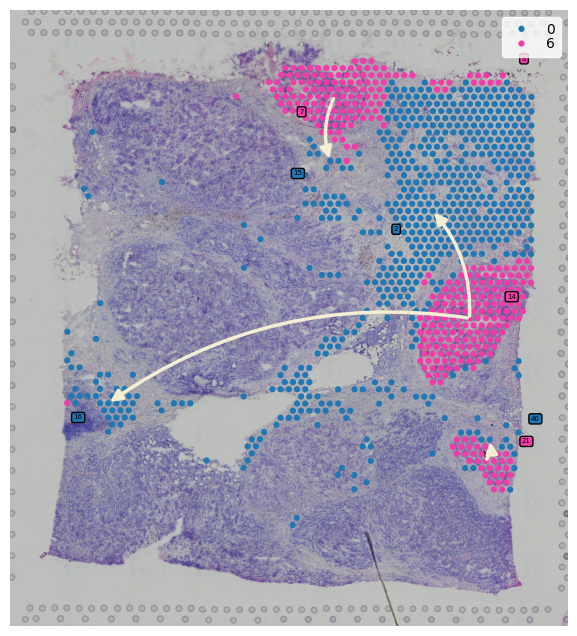

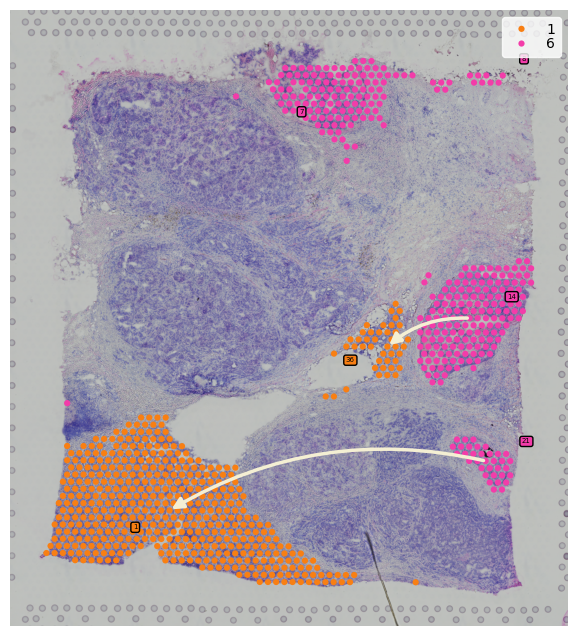

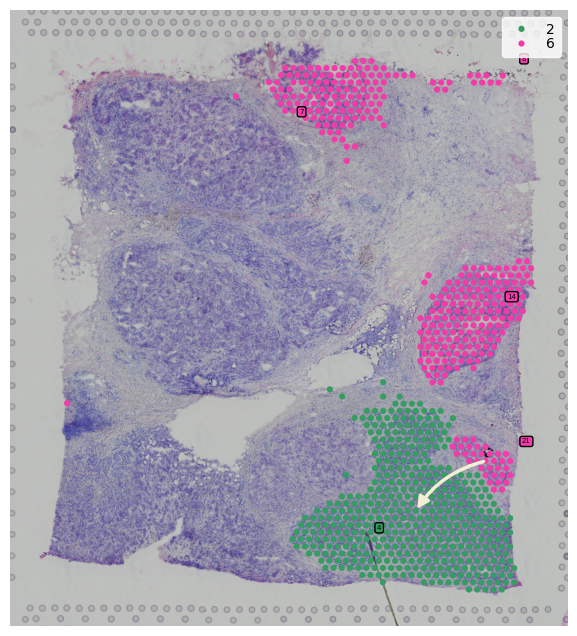

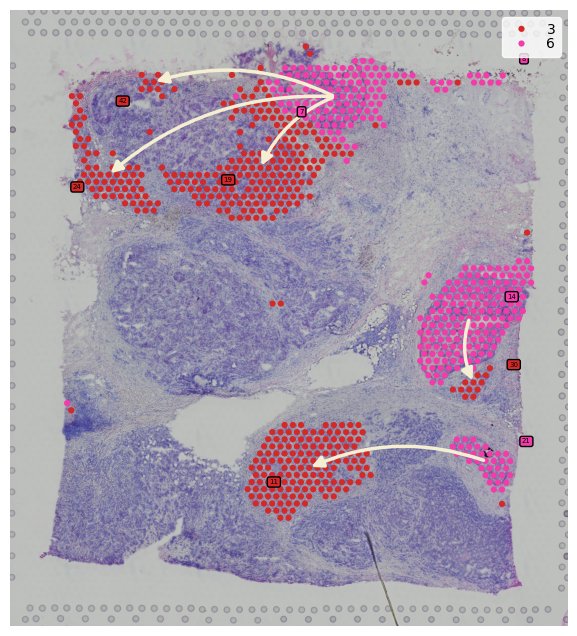

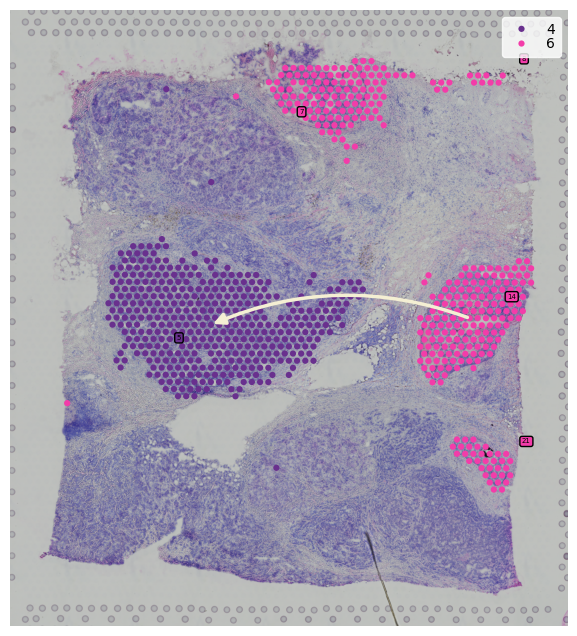

In [2]:
import numpy as np

def automated_spatial_trajectory_analysis(data):
    try:
        # Iterate through clusters 0 to 10
        for cluster in range(10):
            data.uns["iroot"] = st.spatial.trajectory.set_root(data,use_label="louvain",cluster=cluster,use_raw=True) # run will cluster = 0 to 10
            st.spatial.trajectory.pseudotime(data,eps=50,use_rep="X_pca",use_label="louvain")

            # Iterate through clusters 0 to 10
            for cluster2 in range(10):
                # Plot cluster trajectories
                if (cluster == cluster2):
                    continue
                try:
                    st.spatial.trajectory.pseudotimespace_global(data,use_label="louvain",list_clusters=[str(cluster), str(cluster2)])
                    st.pl.cluster_plot(
                        data, 
                        use_label="louvain", 
                        show_trajectories=True, 
                        list_clusters=[str(cluster), str(cluster2)], 
                        show_subcluster=True, 
                        figsize=(10,8), 
                        size=20
                    )

                except Exception as cluster_error:
                    print(f"Error processing cluster {cluster}: {cluster_error}")
                    continue
    
    except Exception as main_error:
        print(f"Main error in spatial trajectory analysis: {main_error}")

# Example usage
automated_spatial_trajectory_analysis(data)